# GRAFICS COMPARATIUS PER MEM√íRIA

# LLibreries

In [23]:
# üì¶ Gesti√≥ b√†sica de dades i formats
import os
import json
import random
import warnings
from datetime import datetime
from itertools import combinations

# üìä Tractament i visualitzaci√≥ de dades
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter, MaxNLocator
import seaborn as sns
import plotly.express as px

# Configuraci√≥ visuals
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings("ignore")  # Ignorar warnings per evitar soroll

# Gr√†fics LSTM

In [24]:
# Carpeta on tens els .csv
carpeta_dades = 'grafics_lstm'

# Llistar arxius .csv
csv_pred_files = [f for f in os.listdir(carpeta_dades) if f.endswith('.csv')]

# Diccionari per guardar els DataFrames
df_preds = {}

# Llegir cada arxiu i guardar-lo amb nom sense extensi√≥
for file_name in csv_pred_files:
    path = os.path.join(carpeta_dades, file_name)
    nom_model = os.path.splitext(file_name)[0]  # sense .csv
    df = pd.read_csv(path)
    df_preds[nom_model] = df

# Exemple: mostrar noms de models carregats
print("Models carregats:", list(df_preds.keys()))

        

Models carregats: ['Exp6_prediccions', 'A2_prediccions', 'C0_prediccions', 'A0_prediccions', 'Exp3_prediccions', 'C2_prediccions']


In [25]:
import os
import pandas as pd

carpeta_dades = 'grafics_lstm'

# Recorre els arxius csv
for arxiu in os.listdir(carpeta_dades):
    if arxiu.endswith('.csv'):
        nom_sense_extensio = os.path.splitext(arxiu)[0]  # p. ex. Exp6_prediccions
        path = os.path.join(carpeta_dades, arxiu)
        
        # Carrega el CSV i assigna'l a una variable amb el mateix nom
        globals()[nom_sense_extensio] = pd.read_csv(path)

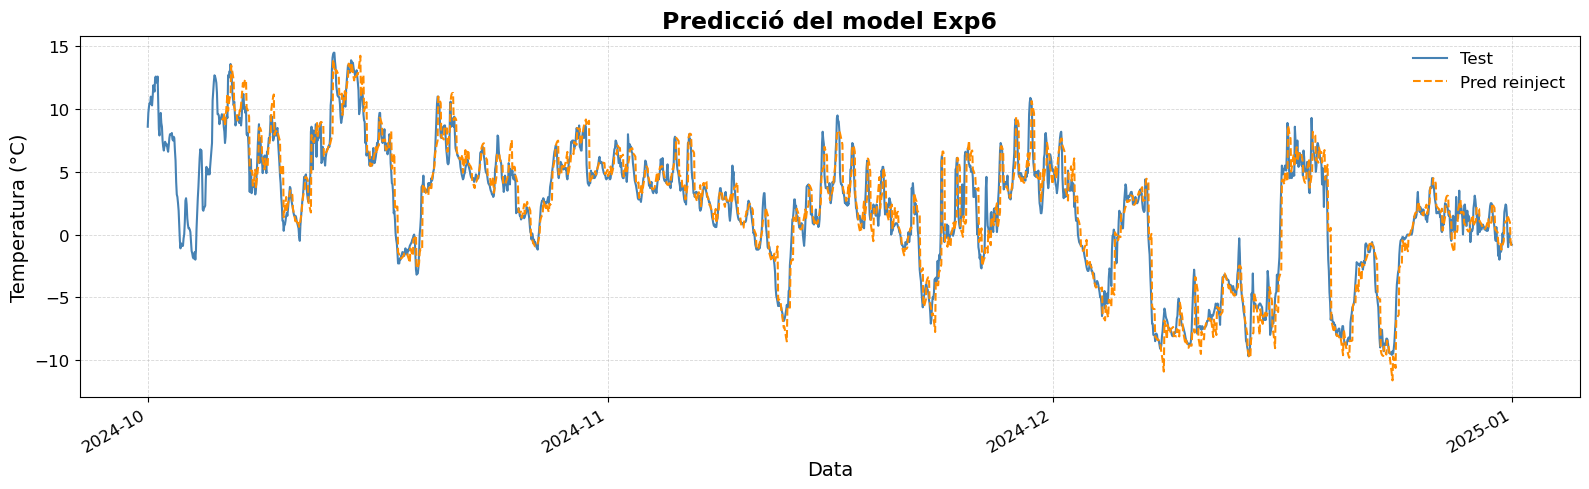

In [26]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors i estil
colors_pred = {
    'pred_batch': 'green',
    'pred_reinject': 'darkorange',
}

linestyle_pred = '--'

# Convertim columna 'data'
Exp6_prediccions['data'] = pd.to_datetime(Exp6_prediccions['data'])

# Crear la figura
fig, ax = plt.subplots(figsize=(16, 5))

# Plot real (test)
ax.plot(Exp6_prediccions['data'], Exp6_prediccions['valor'], label='Test', color='steelblue', linewidth=1.5)

# Prediccions
# for col in ['pred_batch', 'pred_reinject']:
for col in ['pred_reinject']:
    if col in Exp6_prediccions.columns:
        label = col.replace('_', ' ').capitalize()
        ax.plot(
            Exp6_prediccions['data'],
            Exp6_prediccions[col],
            label=label,
            color=colors_pred.get(col, 'gray'),
            linestyle=linestyle_pred,
            linewidth=1.5
        )

# Format eixos i llegenda
ax.set_title("Predicci√≥ del model Exp6", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (¬∞C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar figura
plot_path = os.path.join("plots_memoria_lstm", "Exp6_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


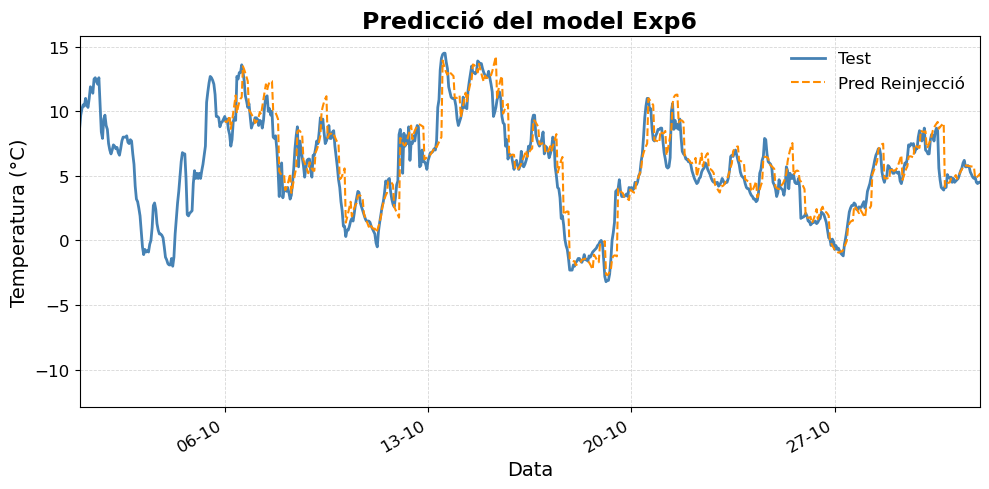

In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Crear carpeta de dest√≠ si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors i estil per prediccions
colors_pred = {
    'pred_batch': 'green',
    'pred_reinject': 'darkorange',
}
linestyle_pred = '--'

# Convertir columna 'data' a datetime (si cal)
Exp6_prediccions['data'] = pd.to_datetime(Exp6_prediccions['data'])

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))

# S√®rie real (test)
ax.plot(
    Exp6_prediccions['data'],
    Exp6_prediccions['valor'],
    label='Test',
    color='steelblue',
    linewidth=2
)

# Predicci√≥ reinjectada
ax.plot(
    Exp6_prediccions['data'],
    Exp6_prediccions['pred_reinject'],
    label='Pred Reinjecci√≥',
    color=colors_pred['pred_reinject'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# T√≠tol i etiquetes
ax.set_title("Predicci√≥ del model Exp6", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (¬∞C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)

# Limitar l'eix X i posar ticks cada 7 dies comen√ßant a 01-10-2024
start_date = pd.Timestamp("2024-10-01")
end_date = pd.Timestamp("2024-11-01")
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

# Format i ajustos
fig.autofmt_xdate()
fig.tight_layout()

# Guardar la figura
plot_path = os.path.join("plots_memoria_lstm", "Exp6_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


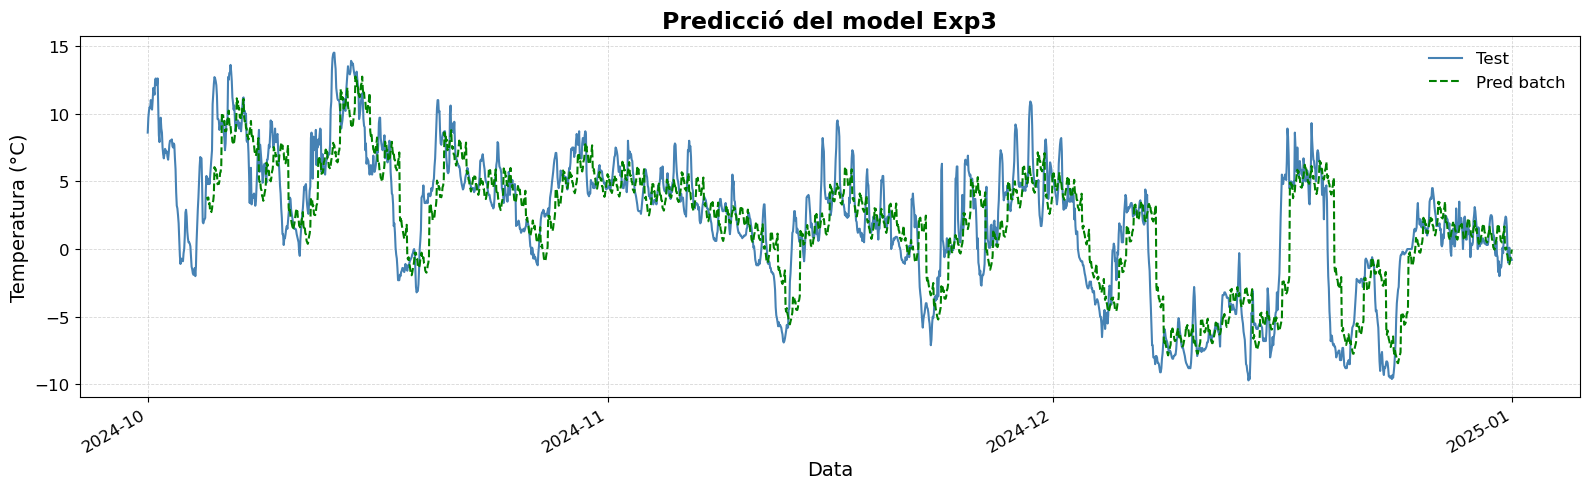

In [28]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors i estil
colors_pred = {
    'pred_batch': 'green',
    'pred_reinject': 'darkorange',
}

linestyle_pred = '--'

# Convertim columna 'data'
Exp3_prediccions['data'] = pd.to_datetime(Exp3_prediccions['data'])

# Crear la figura
fig, ax = plt.subplots(figsize=(16, 5))

# Plot real (test)
ax.plot(Exp3_prediccions['data'], Exp3_prediccions['valor'], label='Test', color='steelblue', linewidth=1.5)

# Prediccions
# for col in ['pred_batch', 'pred_reinject']:
for col in ['pred_batch']:
    if col in Exp3_prediccions.columns:
        label = col.replace('_', ' ').capitalize()
        ax.plot(
            Exp3_prediccions['data'],
            Exp3_prediccions[col],
            label=label,
            color=colors_pred.get(col, 'gray'),
            linestyle=linestyle_pred,
            linewidth=1.5
        )

# Format eixos i llegenda
ax.set_title("Predicci√≥ del model Exp3", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (¬∞C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar figura
plot_path = os.path.join("plots_memoria_lstm", "Exp3_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


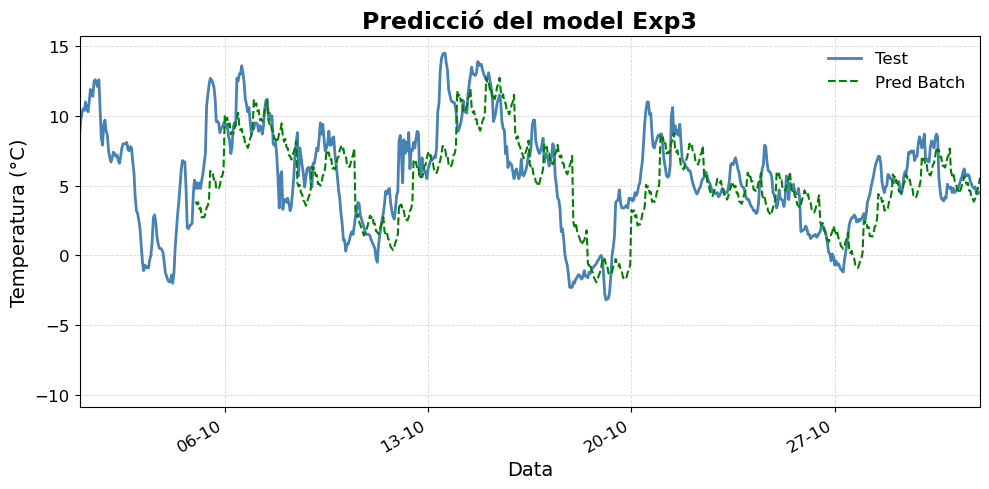

In [29]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors i estil per prediccions
colors_pred = {
    'pred_batch': 'green',
    'pred_reinject': 'darkorange',
}
linestyle_pred = '--'

# Assegurar que la columna 'data' √©s datetime
Exp3_prediccions['data'] = pd.to_datetime(Exp3_prediccions['data'])

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))

# Dades reals (test)
ax.plot(
    Exp3_prediccions['data'],
    Exp3_prediccions['valor'],
    label='Test',
    color='steelblue',
    linewidth=2
)

# Predicci√≥ (nom√©s pred_batch)
ax.plot(
    Exp3_prediccions['data'],
    Exp3_prediccions['pred_batch'],
    label='Pred Batch',
    color=colors_pred['pred_batch'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# T√≠tol i llegenda
ax.set_title("Predicci√≥ del model Exp3", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (¬∞C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)

# Limitar eix X
ax.set_xlim(pd.Timestamp("2024-10-01"), pd.Timestamp("2024-11-01"))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Cada 7 dies

# Format i guardar
fig.autofmt_xdate()
fig.tight_layout()
plot_path = os.path.join("plots_memoria_lstm", "Exp3_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


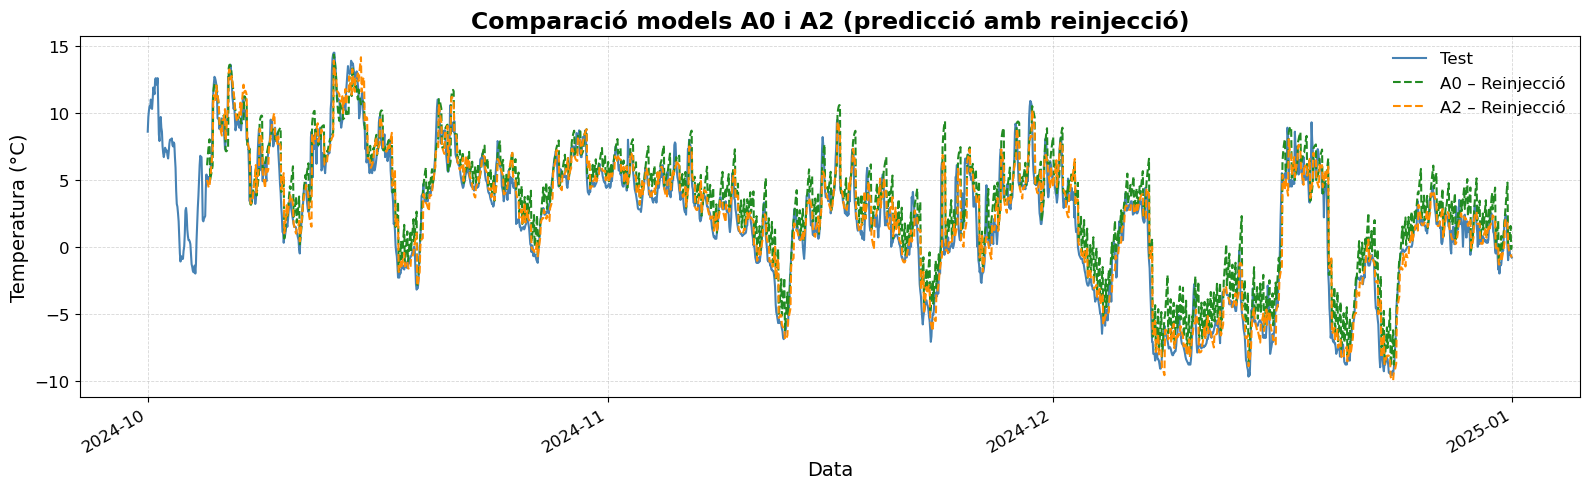

In [30]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors per cada model
colors_model = {
    'A0': 'forestgreen',
    'A2': 'darkorange',
}

# Linia discont√≠nua
linestyle_pred = '--'

# Assegurar que la columna 'data' √©s datetime
A0_prediccions['data'] = pd.to_datetime(A0_prediccions['data'])
A2_prediccions['data'] = pd.to_datetime(A2_prediccions['data'])

# Crear figura
fig, ax = plt.subplots(figsize=(16, 5))

# Dades reals (de qualsevol dels dos, s√≥n les mateixes)
ax.plot(A0_prediccions['data'], A0_prediccions['valor'], label='Test', color='steelblue', linewidth=1.5)

# Plot A0
ax.plot(
    A0_prediccions['data'],
    A0_prediccions['pred_reinject'],
    label='A0 ‚Äì Reinjecci√≥',
    color=colors_model['A0'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Plot A2
ax.plot(
    A2_prediccions['data'],
    A2_prediccions['pred_reinject'],
    label='A2 ‚Äì Reinjecci√≥',
    color=colors_model['A2'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Format eixos i llegenda
ax.set_title("Comparaci√≥ models A0 i A2 (predicci√≥ amb reinjecci√≥)", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (¬∞C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar figura
plot_path = os.path.join("plots_memoria_lstm", "A0_A2_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


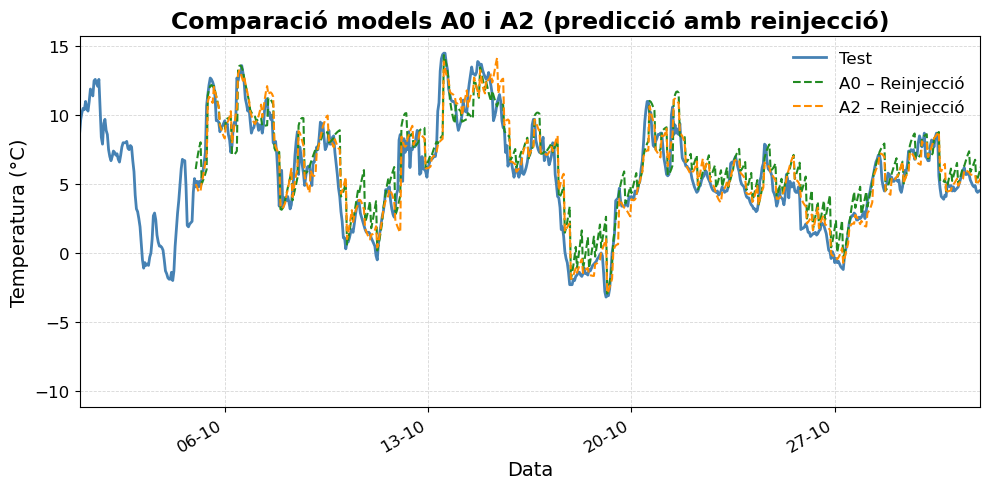

In [31]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors per cada model
colors_model = {
    'A0': 'forestgreen',
    'A2': 'darkorange',
}

linestyle_pred = '--'

# Convertir 'data' a datetime
A0_prediccions['data'] = pd.to_datetime(A0_prediccions['data'])
A2_prediccions['data'] = pd.to_datetime(A2_prediccions['data'])

# Crear figura
fig, ax = plt.subplots(figsize=(10, 5))

# S√®rie real (test)
ax.plot(
    A0_prediccions['data'],
    A0_prediccions['valor'],
    label='Test',
    color='steelblue',
    linewidth=2
)

# Reinjecci√≥ A0
ax.plot(
    A0_prediccions['data'],
    A0_prediccions['pred_reinject'],
    label='A0 ‚Äì Reinjecci√≥',
    color=colors_model['A0'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Reinjecci√≥ A2
ax.plot(
    A2_prediccions['data'],
    A2_prediccions['pred_reinject'],
    label='A2 ‚Äì Reinjecci√≥',
    color=colors_model['A2'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# T√≠tol i eixos
ax.set_title("Comparaci√≥ models A0 i A2 (predicci√≥ amb reinjecci√≥)", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (¬∞C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)

# Limitar a octubre 2024
ax.set_xlim(pd.Timestamp("2024-10-01"), pd.Timestamp("2024-11-01"))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar la figura
plot_path = os.path.join("plots_memoria_lstm", "A0_A2_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


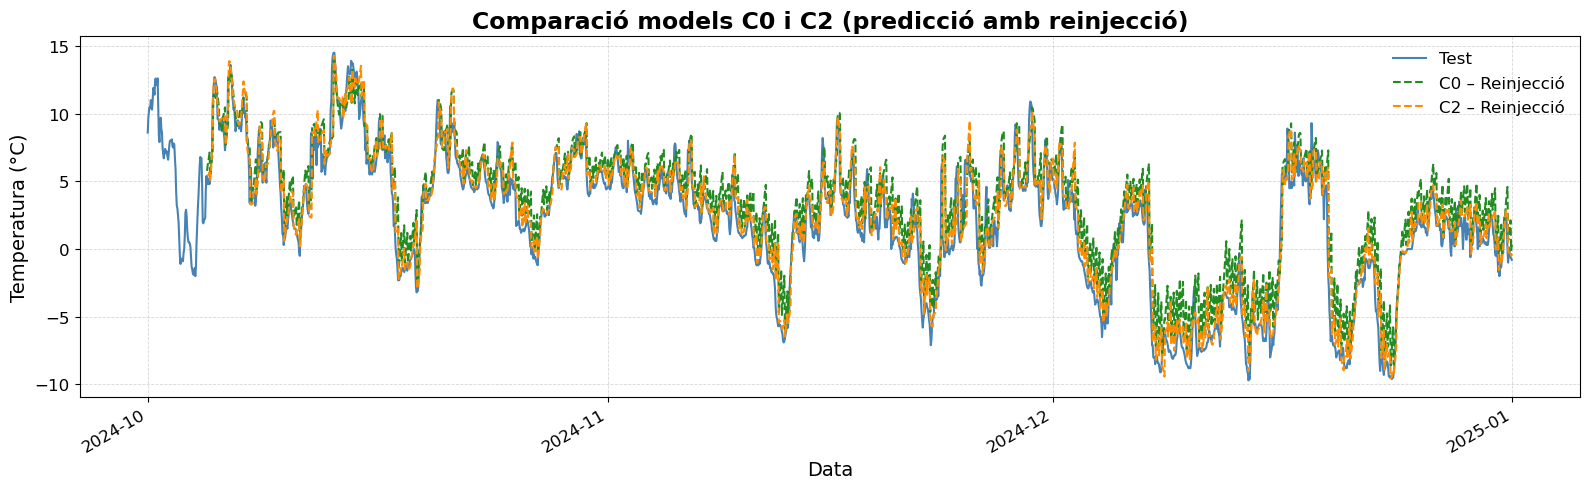

In [32]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors per cada model
colors_model = {
    'C0': 'forestgreen',
    'C2': 'darkorange',
}

# Linia discont√≠nua
linestyle_pred = '--'

# Assegurar que la columna 'data' √©s datetime
C0_prediccions['data'] = pd.to_datetime(C0_prediccions['data'])
C2_prediccions['data'] = pd.to_datetime(C2_prediccions['data'])

# Crear figura
fig, ax = plt.subplots(figsize=(16, 5))

# Dades reals (de qualsevol dels dos, s√≥n les mateixes)
ax.plot(C0_prediccions['data'], C0_prediccions['valor'], label='Test', color='steelblue', linewidth=1.5)

# Plot A0
ax.plot(
    C0_prediccions['data'],
    C0_prediccions['pred_reinject'],
    label='C0 ‚Äì Reinjecci√≥',
    color=colors_model['C0'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Plot A2
ax.plot(
    C2_prediccions['data'],
    C2_prediccions['pred_reinject'],
    label='C2 ‚Äì Reinjecci√≥',
    color=colors_model['C2'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Format eixos i llegenda
ax.set_title("Comparaci√≥ models C0 i C2 (predicci√≥ amb reinjecci√≥)", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (¬∞C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar figura
plot_path = os.path.join("plots_memoria_lstm", "C0_C2_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


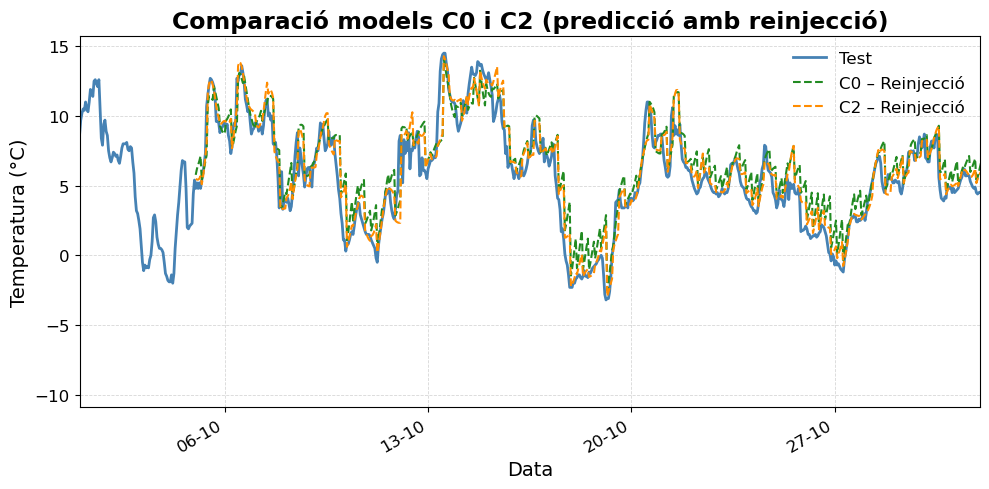

In [33]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Crear carpeta si no existeix
os.makedirs("plots_memoria_lstm", exist_ok=True)

# Colors per cada model
colors_model = {
    'C0': 'forestgreen',
    'C2': 'darkorange',
}

# Estil de l√≠nia
linestyle_pred = '--'

# Convertir columna 'data' a datetime
C0_prediccions['data'] = pd.to_datetime(C0_prediccions['data'])
C2_prediccions['data'] = pd.to_datetime(C2_prediccions['data'])

# Crear figura
fig, ax = plt.subplots(figsize=(10, 5))

# S√®rie real (test)
ax.plot(
    C0_prediccions['data'],
    C0_prediccions['valor'],
    label='Test',
    color='steelblue',
    linewidth=2
)

# Predicci√≥ reinjecci√≥ C0
ax.plot(
    C0_prediccions['data'],
    C0_prediccions['pred_reinject'],
    label='C0 ‚Äì Reinjecci√≥',
    color=colors_model['C0'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Predicci√≥ reinjecci√≥ C2
ax.plot(
    C2_prediccions['data'],
    C2_prediccions['pred_reinject'],
    label='C2 ‚Äì Reinjecci√≥',
    color=colors_model['C2'],
    linestyle=linestyle_pred,
    linewidth=1.5
)

# Format general
ax.set_title("Comparaci√≥ models C0 i C2 (predicci√≥ amb reinjecci√≥)", fontsize=17, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Temperatura (¬∞C)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.6)
ax.legend(fontsize=12, frameon=False)

# Limitar a 1 mes concret (octubre 2024)
ax.set_xlim(pd.Timestamp("2024-10-01"), pd.Timestamp("2024-11-01"))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

fig.autofmt_xdate()
fig.tight_layout()

# Guardar figura
plot_path = os.path.join("plots_memoria_lstm", "C0_C2_plot_def.png")
plt.savefig(plot_path, dpi=300)
plt.show()


# Grafics ARIMA

In [35]:
# Carpeta on tens els .csv
carpeta_dades = 'grafics_arima'

# Llistar arxius .csv
csv_pred_files = [f for f in os.listdir(carpeta_dades) if f.endswith('.csv')]

# Diccionari per guardar els DataFrames
df_preds = {}

# Llegir cada arxiu i guardar-lo amb nom sense extensi√≥
for file_name in csv_pred_files:
    path = os.path.join(carpeta_dades, file_name)
    nom_model = os.path.splitext(file_name)[0]  # sense .csv
    df = pd.read_csv(path)
    df_preds[nom_model] = df

# Exemple: mostrar noms de models carregats
print("Models carregats:", list(df_preds.keys()))

        

Models carregats: []


In [36]:
import os
import pandas as pd

carpeta_dades = 'grafics_lstm'

# Recorre els arxius csv
for arxiu in os.listdir(carpeta_dades):
    if arxiu.endswith('.csv'):
        nom_sense_extensio = os.path.splitext(arxiu)[0]  # p. ex. Exp6_prediccions
        path = os.path.join(carpeta_dades, arxiu)
        
        # Carrega el CSV i assigna'l a una variable amb el mateix nom
        globals()[nom_sense_extensio] = pd.read_csv(path)